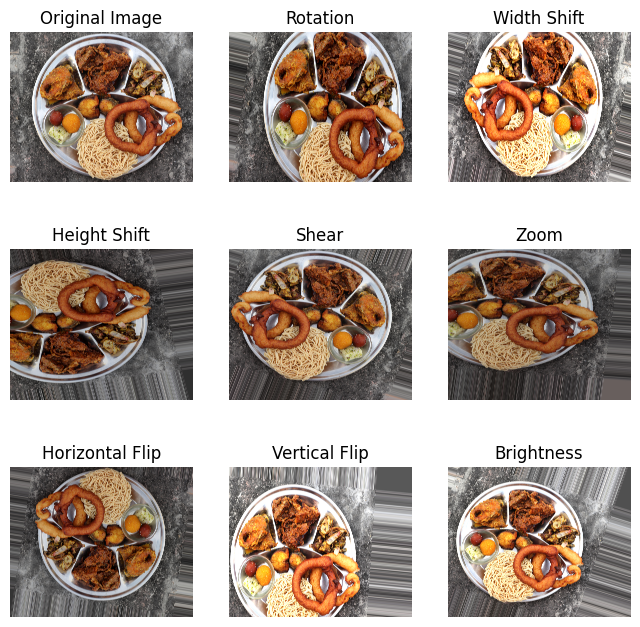

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the directory containing the images
image_dir = "C:/Users/user_99/Desktop/visualization/images"

# List all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Loop through each image file
for image_file in image_files:
    # Load the image
    image_path = os.path.join(image_dir, image_file)
    original_image = cv2.imread(image_path)  # Assuming the image is in BGR format

    # Check if the image is loaded successfully
    if original_image is None:
        print(f"Error: Unable to load image from {image_path}")
    else:
        # Display the original image
        plt.figure(figsize=(8, 8))
        plt.subplot(3, 3, 1)
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Original Image: {image_file}')
        plt.axis('off')

        # Create an ImageDataGenerator without rescale, validation_split, and preprocessing_function
        augmentation_datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            vertical_flip=True,
            brightness_range=[0.5, 1.5],
            channel_shift_range=50,
            fill_mode='nearest'
        )

        # Reshape the image to (1, height, width, channels) to fit the flow method
        image_for_augmentation = np.expand_dims(original_image, axis=0)

        # Generate augmented images
        augmented_images = augmentation_datagen.flow(image_for_augmentation, batch_size=9)

        # Augmentation labels
        augmentation_labels = [
            'Rotation', 'Width Shift', 'Height Shift', 'Shear',
            'Zoom', 'Horizontal Flip', 'Vertical Flip', 'Brightness'
        ]

        # Display augmented images with labels
        for i in range(2, 10):
            augmented_image = augmented_images.next()[0].astype(np.uint8)
            label = augmentation_labels[i - 2]  # Adjust the index
            plt.subplot(3, 3, i)
            plt.imshow(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
            plt.title(f'{label}')
            plt.axis('off')

        plt.show()